## Kmean clustring

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.datasets import make_blobs

In [2]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0],[100,110],[1000,1200]])

In [3]:
X

array([[   1,    2],
       [   1,    4],
       [   1,    0],
       [  10,    2],
       [  10,    4],
       [  10,    0],
       [ 100,  110],
       [1000, 1200]])

In [4]:
kmeans = KMeans(n_clusters=4)

In [5]:
kmeans.fit(X)

KMeans(n_clusters=4)

In [6]:
kmeans.labels_

array([3, 3, 3, 0, 0, 0, 2, 1])

In [7]:
data = pd.DataFrame(X)

In [8]:
lables = pd.DataFrame(kmeans.labels_)

In [9]:
clustered = pd.concat([data,lables],axis=1)

In [10]:
clustered

,0,1,0
0,1,2,3
1,1,4,3
2,1,0,3
3,10,2,0
4,10,4,0
5,10,0,0
6,100,110,2
7,1000,1200,1


In [11]:
kmeans.predict([[0, 0], [12, 3],[99,10]])

array([3, 0, 0])

In [12]:
kmeans.cluster_centers_

array([[1.0e+01, 2.0e+00],
       [1.0e+03, 1.2e+03],
       [1.0e+02, 1.1e+02],
       [1.0e+00, 2.0e+00]])

In [13]:
# EG 2
x,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=10)

In [14]:
x

array([[ 4.56889035, -9.9492391 ],
       [ 2.35388502,  3.51466401],
       [-0.01750156, -6.05038477],
       ...,
       [ 4.89123569,  4.86995972],
       [ 1.09272697,  4.04641343],
       [ 0.97077866, -4.8289551 ]])

In [15]:
y

array([0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0,
       2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2, 0,
       1, 0, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2,
       2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2,
       2, 1, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 1,
       2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2,
       1, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 1, 2, 2, 1, 2,
       1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2,
       1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0,
       0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2,

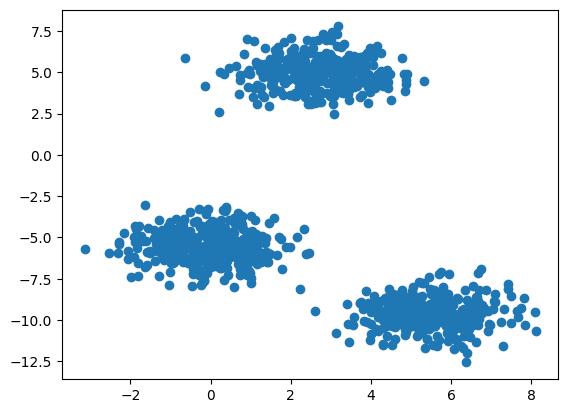

In [16]:
plt.scatter(x[:,0],x[:,1])

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(670, 2)
(330, 2)
(670,)
(330,)


In [19]:
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init="k-means++")
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [20]:
wcss

[6418.719161686613,
 1236.9677964109565,
 1081.0301943441657,
 946.7041774235568,
 812.653477105915,
 723.0191867333621,
 629.4539543936778,
 550.9874674650507,
 510.640016133044]

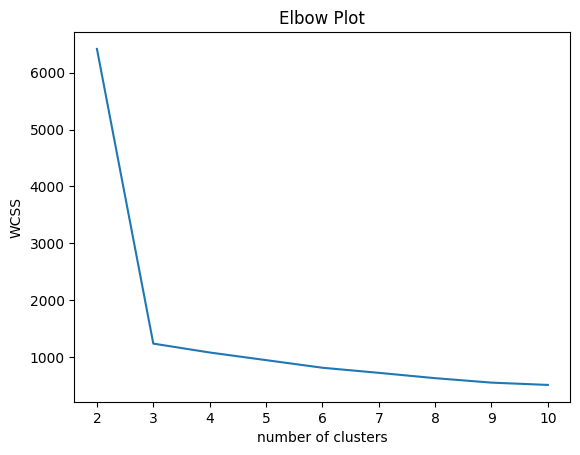

In [21]:
plt.title("Elbow Plot")
plt.plot(range(2,11),wcss)
plt.xticks(range(2,11))
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

In [22]:
kmeans = KMeans(n_clusters=3,init="k-means++")

In [23]:
y_lables = kmeans.fit_predict(X_train)

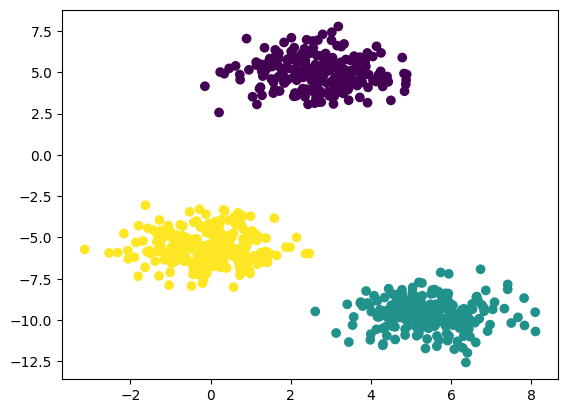

In [24]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_lables)

In [25]:
from kneed import KneeLocator

In [26]:
# second method
k = KneeLocator(range(2,11),wcss,curve="convex",direction='decreasing')

In [27]:
k.elbow

3

In [28]:
from sklearn.metrics import silhouette_score

In [30]:
silhouette_cofficient = []
for i in range(2,11):
    kmean = KMeans(n_clusters=i,init="k-means++")
    kmean.fit(X_train)
    score = silhouette_score(X_train,kmean.labels_)
    silhouette_cofficient.append(score)

In [31]:
silhouette_cofficient

[0.7261324242249295,
 0.783092470463928,
 0.6088994627094285,
 0.4683164100103571,
 0.31798580142653343,
 0.33272168327115687,
 0.3371241999849255,
 0.3395184214805836,
 0.32169514043502134]

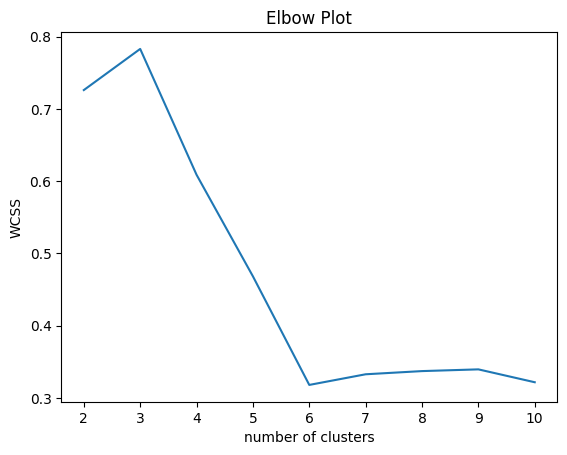

In [32]:
plt.title("Elbow Plot")
plt.plot(range(2,11),silhouette_cofficient)
plt.xticks(range(2,11))
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()